In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [115]:
# 定义输入和输出文件路径（注意使用双反斜杠或原始字符串）
inputfile = 'data/consumption_data.xls'
outputfile = 'data/cantin_type.xlsx'

In [116]:
# 读取数据并进行标准化
data = pd.read_excel(inputfile, index_col='Id')
data_zs = (data - data.mean()) / data.std()

In [117]:

# 聚类
k = 3
iteration = 500

data = pd.read_excel(inputfile, index_col='Id')

# 标准化处理
data_zs = 1.0 * (data - data.mean()) / data.std()

# 聚类
model = KMeans(n_clusters=k, max_iter=iteration, random_state=42)
model.fit(data_zs)

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=500, n_clusters=3, random_state=42)

In [118]:
# 聚类结果
r1 = pd.Series(model.labels_).value_counts()
r2 = pd.DataFrame(model.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data.columns) + [u'类别数目']

In [119]:
# 将聚类标签添加到原始数据
data_with_labels = pd.concat([data, pd.Series(model.labels_, index=data.index, name='聚类类别')], axis=1)
# 保存结果到 Excel 文件
data_with_labels.to_excel(outputfile)

In [120]:
# 绘制密度图
def density_plot(data, pic_output, k):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    P = data.plot(kind='kde', linewidth=2, subplots=True, sharex=False)
    [p.set_ylabel(u'密度') for p in P]
    plt.legend()
    plt.savefig('%s%d.png' % (pic_output, k))

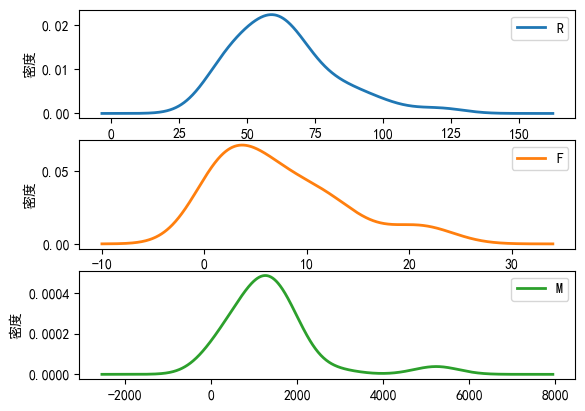

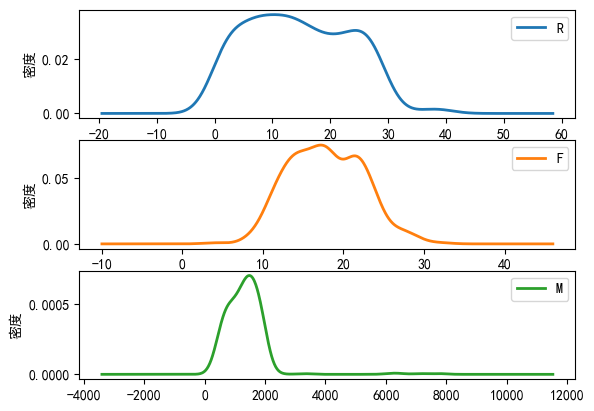

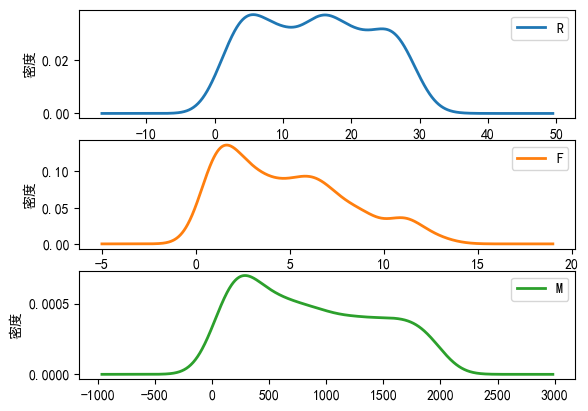

In [122]:
# 保存每个类别的密度图（注意修改保存路径为合适的格式）
pic_output = 'data/pd_'  # 调整保存路径
for i in range(k):
    density_plot(data[model.labels_ == i], '%s%d' % (pic_output, i), i)  # 使用正确的索引条件